# Statistics and Sampling

## Importing relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Goals of this lecture

This is the final lecture before we turn to **statistical modeling**.

There are a few goals:

- Shift from merely **descriptive statistics** (`mean`, etc.) to [**inferential statistics**](https://en.wikipedia.org/wiki/Statistical_inference).  
  - Distinguishing **samples** vs. **populations**.
  - Recognizing **sampling error**.
- **Standard error** and the basics of sampling distributions.

### Brief caveat

This is *not* an exhaustive introduction to inferential statistics! We will *not* be covering the details traditional null hypothesis significance tests, including:

- t-test
- ANOVA
- chi-squared test

Rather, I want to *motivate* a few concepts that will be relevant for a deep understanding of **statistical modeling**.

- Sampling distributions and sampling error
- Sampling error
- Standard error

## Descriptive vs. inferential statistics

There are at least two shelves in the statistics "toolbox":

- **Descriptive statistics**: describing the data you have (e.g., `mean`, `median`, `std`, etc.).  
- **Inferential statistics**: trying to generalize from the data you have to a broader **population**.

### Samples vs. populations

> In statistics, a **population** is a set of *potential* observations that you're interested in.

It's rare to observe the entire population of interest, unless the population is very narrow.
 - E.g., "All humans across the world" is very broad.
 - Even "All UCSD students" is a large population.

Thus, we typically rely on a **sample**.

> A **sample** is an *actual* set of observations drawn from the population. 

### The challenge of generalization

In order to generalize, samples must be **random** and **representative**.

- Otherwise, we might **over-represent** or **under-represent** certain sub-populations.  

Unfortunately, many samples are **"convenience samples"**––whatever's available at the time.

- E.g., ["WEIRD" subjects](https://en.wikipedia.org/wiki/Weird) in Psychology research.

#### Check-in

What's an example from earlier in the class of how a non-representative sample can lead to **biased** models?

#### Solutions

An example we discussed was from the [Gender Shades paper (Buolamwini & Gebru, 2018)](http://proceedings.mlr.press/v81/buolamwini18a.html?mod=article_inline), which showed:

> We find that these datasets are overwhelmingly composed of lighter-skinned subjects...

And also that:

> The substantial disparities in the accuracy of classifying darker females, lighter females, darker males, and lighter males in gender classification systems require urgent attention if commercial companies are to build genuinely fair, transparent and accountable facial analysis algorithms.

### Sampling error: a further challenge

Even if one's sample *is* representative, it's never *identical* to the underlying population.

> **Sampling error** means that *statistics* calculated on a sample (e.g., `mean`) will rarely (if ever) be identical to the underlying *population parameter*.

#### Illustrating sampling error

The **sample mean** ($\bar{X}$) will rarely, if ever, be identical to the **population mean** ($\mu$).

In [3]:
## First, create a "population"
np.random.seed(10)
pop = np.random.normal(loc = 0, scale = 3, size = 1000)
pop.mean()

-0.04366990684641133

In [4]:
## Now, sample from that population using np.sample
sample = np.random.choice(pop, size = 100)
sample.mean()

-0.17870546982513766

#### Check-in

What if we took a *bunch* of samples from our population, all of the same size, and calculated the mean of each sample?

- What might we *call* this set of sample statistics?  
- What do you think would be true of the `mean` of this set of sample statistics?

#### Solution

This is called a **sampling distribution**.

This **sampling distribution** would be normally distributed around the true population mean!

## Introducing *sampling distributions*

> A **sampling distribution** is the distribution of sample statistics (e.g., `mean`) taken from *all possible* samples of size $n$.

### Sampling distributions in action

First, we simulate a ground gruth population.

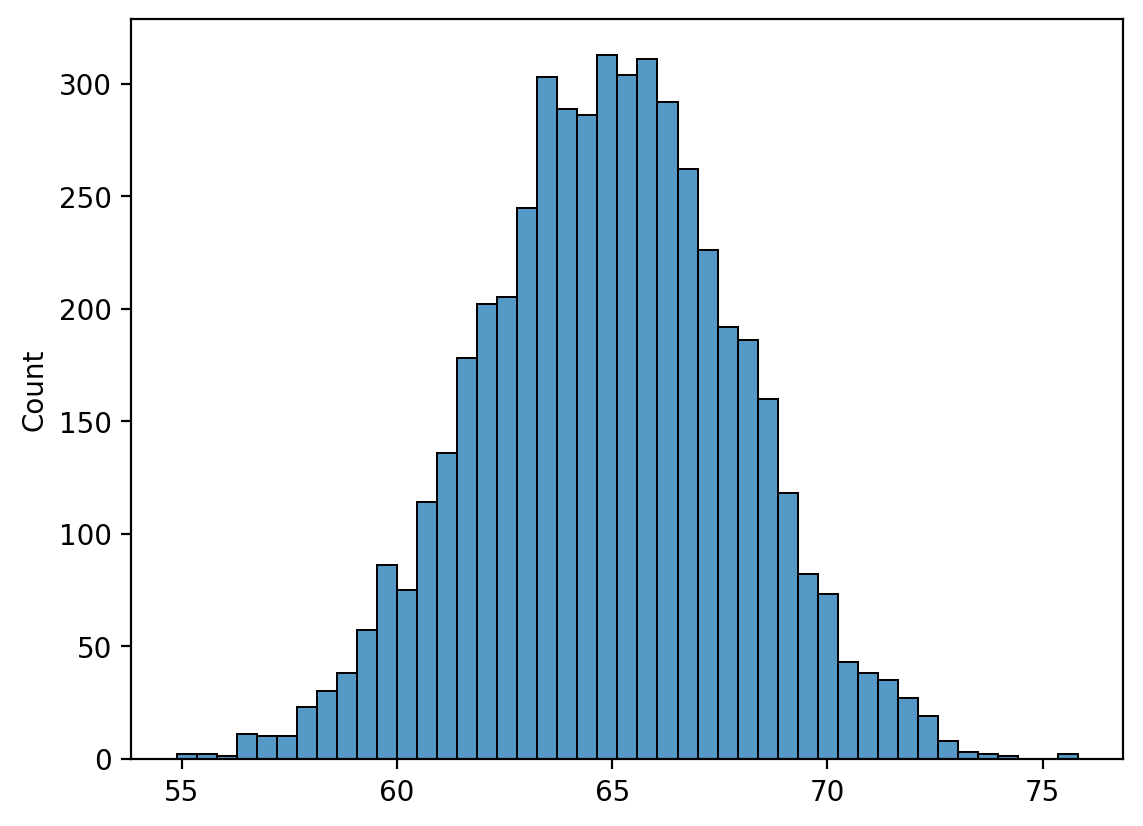

In [5]:
np.random.seed(seed=10)
pop = np.random.normal(loc = 65, scale = 3, size = 5000)
g = sns.histplot(pop)

#### Creating the sampline distribution

Now, we sample from that population 300 times, with each sample size $n = 5$. 

What do we notice about the distribution of those sample means? (Note this is not a "true" sampling distribution in that it's not every possible sample.)

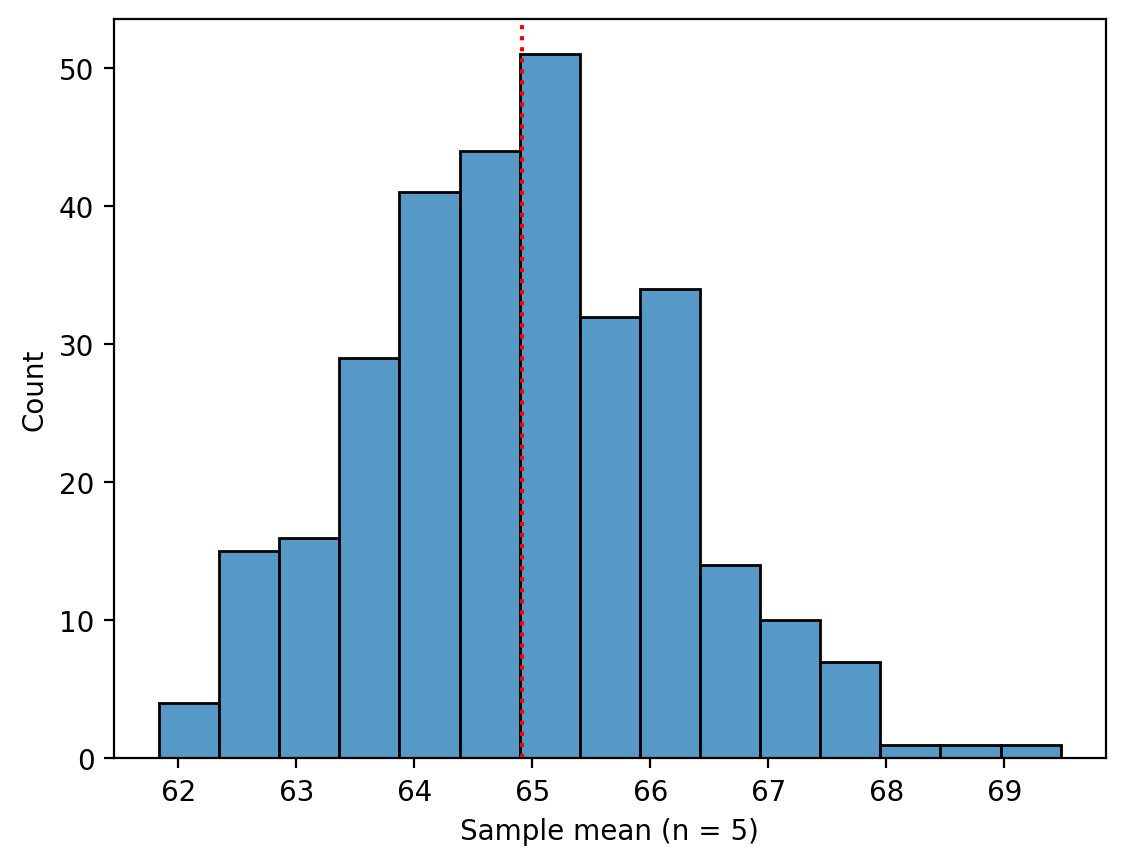

In [6]:
sample_means_n5 = []
for _ in range(300):
    sample = np.random.choice(pop, size = 5, replace = False)
    sample_means_n5.append(sample.mean())
    
g = sns.histplot(sample_means_n5)
plt.xlabel("Sample mean (n = 5)")
plt.axvline(pop.mean(), linestyle = "dotted", color = "red")

### Why $n$ matters

Now let's compare several distributions:  

- The original population  
- Sampling distribution with $n = 15$  
- Sampling distribution with $n = 40$

#### Creating a new sampling distribution where $n=40$

In [7]:
sample_means_n40 = []
for _ in range(300):
    sample = np.random.choice(pop, size = 40, replace = False)
    sample_means_n40.append(sample.mean())

#### Visualizing side by side

What do we notice about the sampling distribution as $n$ gets larger?

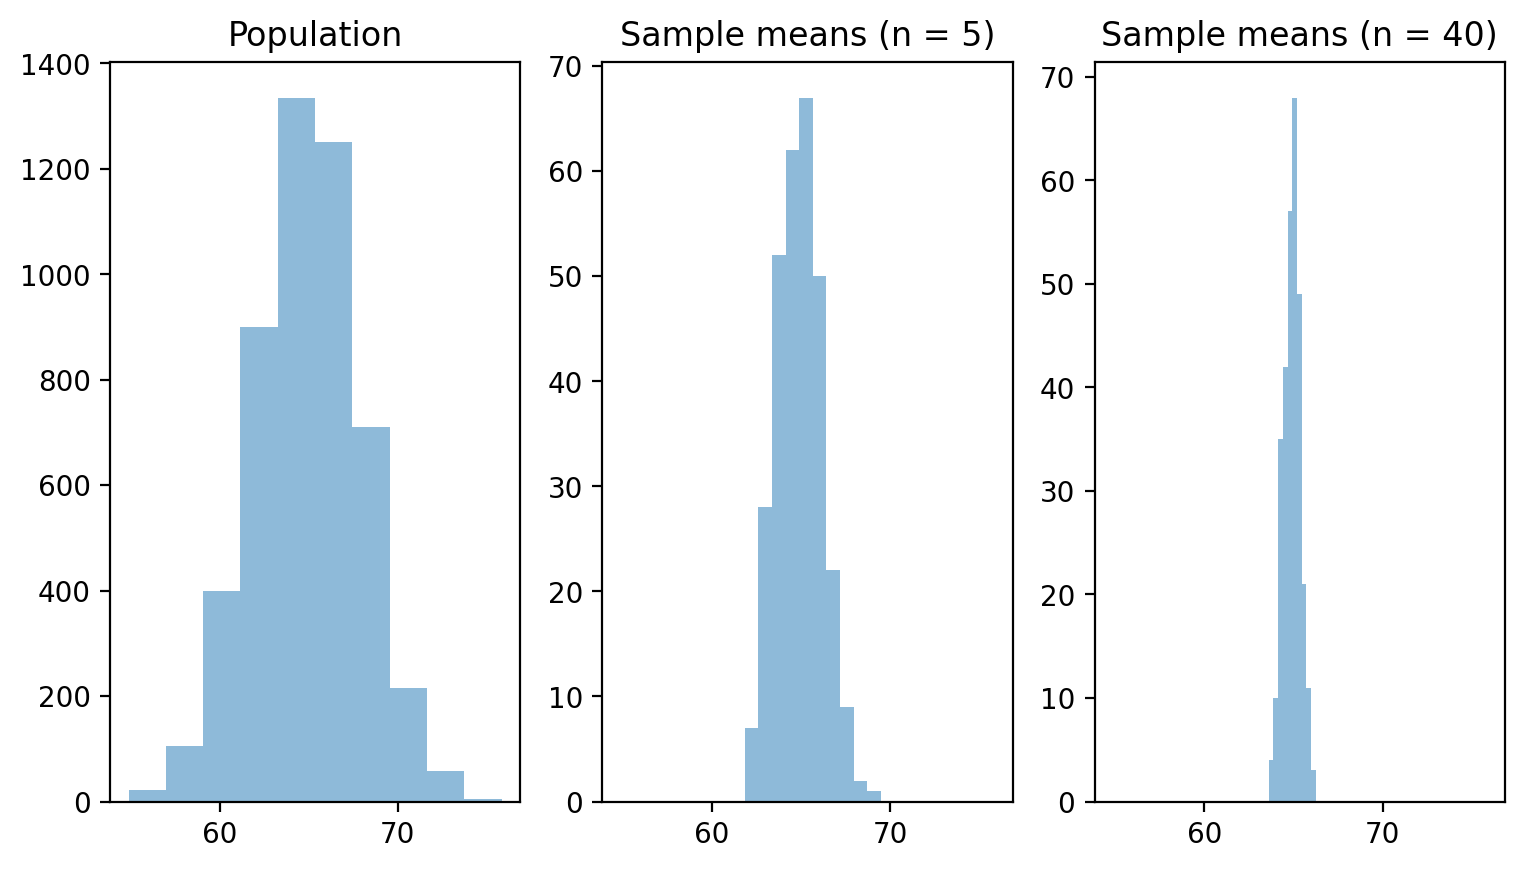

In [8]:
## Now, we visualize them altogether
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True)
f.set_figwidth(9)
og = ax1.hist(pop, alpha = .5)
ax1.title.set_text("Population")
og_s1 = ax2.hist(sample_means_n5, alpha = .5)
ax2.title.set_text("Sample means (n = 5)")
og_s2 = ax3.hist(sample_means_n40, alpha = .5)
ax3.title.set_text("Sample means (n = 40)")

### Why $n$ matters (reprise)

As $n$ increases: 

- Sampling distribution looks increasingly **normal**  
- The variance of our sampling distribution **decreases**. 

This is, in essence, the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

This is even true of **skewed distributions**!

### Quantifying sampling distribution variance

A larger $n$ should increase our confidence that our **sample statistic** is a good approximation of our **population parameter**.

- Larger $n$ means lower *variance* of our sampling distribution.  
- In turn, this means that *any given* sample statistic is relatively close to the population parameter.

How might we *quantify* the amount of variance in our hypothetical sampling distribution?

## Introducing *standard error*

> **Standard error** gives us a measure of the variance of our *sampling distribution*.

**Standard error (SE)** is defined as:

$\Large SE = \frac{s}{\sqrt{n}}$

Where $s$ is the standard deviation of the sample.

### Check-in

How is **standard error** different from **standard deviation**?

### Standard error depends on $n$

- Standard deviation is invariant to the *size* of our sample. 
- Standard error gets smaller as our sample size ($n$) increases.
   - SE *reflects* both standard deviation and $n$.

Text(0, 0.5, 'Standard Error')

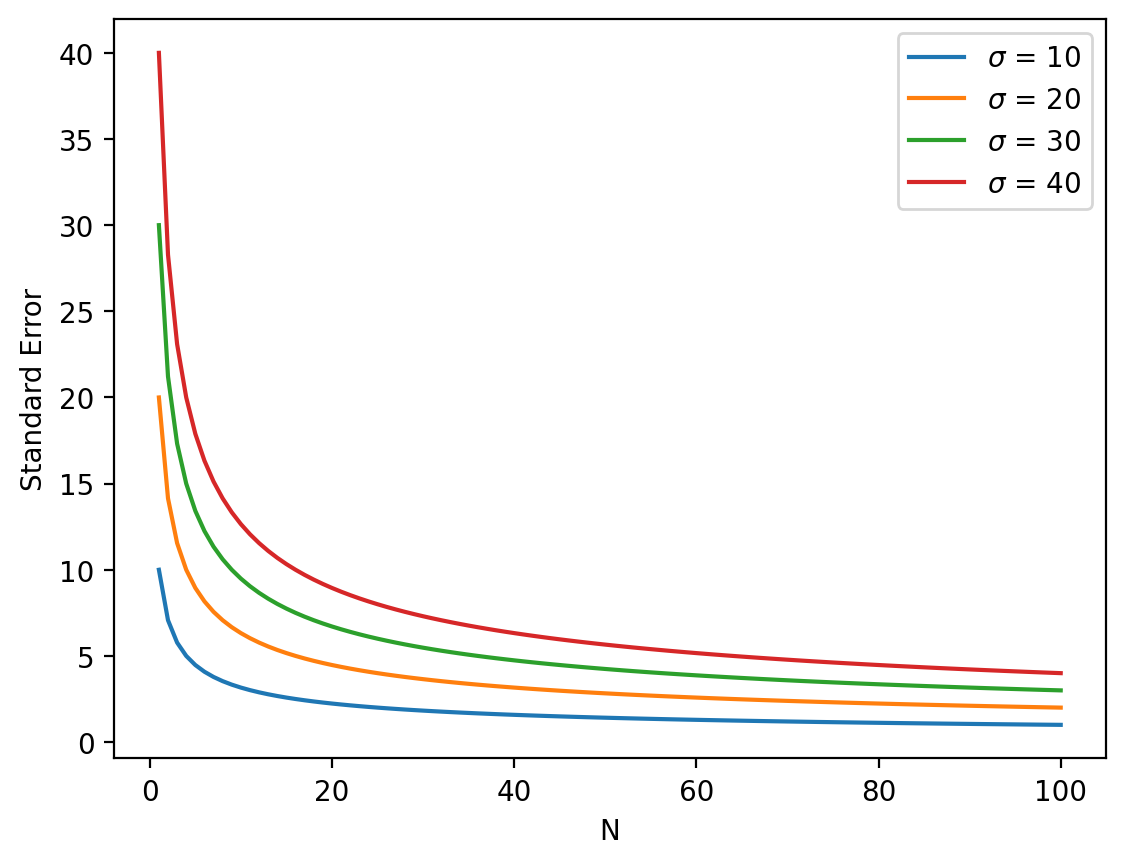

In [9]:
Ns = np.linspace(1, 100, num = 100)
for sigma in [10, 20, 30, 40]:
    se = sigma / np.sqrt(Ns)
    plt.plot(Ns, se, label = "$\sigma$ = {x}".format(x=sigma))
plt.legend()
plt.xlabel("N")
plt.ylabel("Standard Error")

### Caclulating SE with `pandas`

`pandas` gives us a function (`sem`) to calculate standard error of the mean (SE) directly on a column.

In [10]:
df_height = pd.read_csv("data/wrangling/height.csv")
df_height['Father'].sem()

0.08363032857029366

### Reporting standard error

A common way to use standard error is to **report** it alongside the sample mean:

> The mean of our sample was $25$, $\pm 3.5$ (SE).  

That "$\pm$" symbol just indicates some **uncertainty** about our sample statistic.  

## Conclusion

This concludes our brief foray into **inferential statistics**.

The goal was primarily to introduce a few key concepts:

- Sampling error: sample statitics ≠ population parameter.  
- Sampling distributions: a distribution of all sample statistics from samples of size $n$.  
- Standard error: a quantification of the variance in our sampling distribution.

Together, these concepts will help *ground* future discussions of statistical modeling.